In [52]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas
from io import StringIO
import networkx as nx
import sympy

In [4]:
TP = "../src/tp"
TEST_DIR = "../tests/"

def run_test(test_name: str, niter: int, eps: float): 
    !{TP} {TEST_DIR + test_name} {niter} {eps}

# def absolute_error(test_result: str, expected_result: str):
#     test_table = read_result(test_result)
#     expected_table = read_result(expected_result)
#     return abs(test_table - expected_table)

def read_result_autovalores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovalores.out', names=["autovalores"])

def read_result_autovectores(test_result: str):
    return pandas.read_csv(TEST_DIR + test_result + '_autovectores.out' , names=["autovectores"])

## 2. KARATE CLUB

In [35]:
run_test("karateclub_matriz.txt", 1000, 0.00001)
run_test("prueba.txt", 1000, 0.00001)

Corriendo el programa...
Corriendo el programa...


In [51]:
eigenvalues_karate = read_result_autovalores("karateclub_matriz.txt")
eigenvectors_karate = read_result_autovectores("karateclub_matriz.txt")
eigenvalues_prueba = read_result_autovalores("prueba.txt")
eigenvectors_prueba = read_result_autovectores("prueba.txt")

In [47]:
eigenvalues_prueba

,autovalores
0,5.302525
1,1.698788
2,-0.998669


In [8]:
input = np.loadtxt(TEST_DIR + "karateclub_matriz.txt", dtype='i', delimiter=' ')
print(input)

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


## 3. EGO FACEBOOK

NameError: name 'i' is not defined

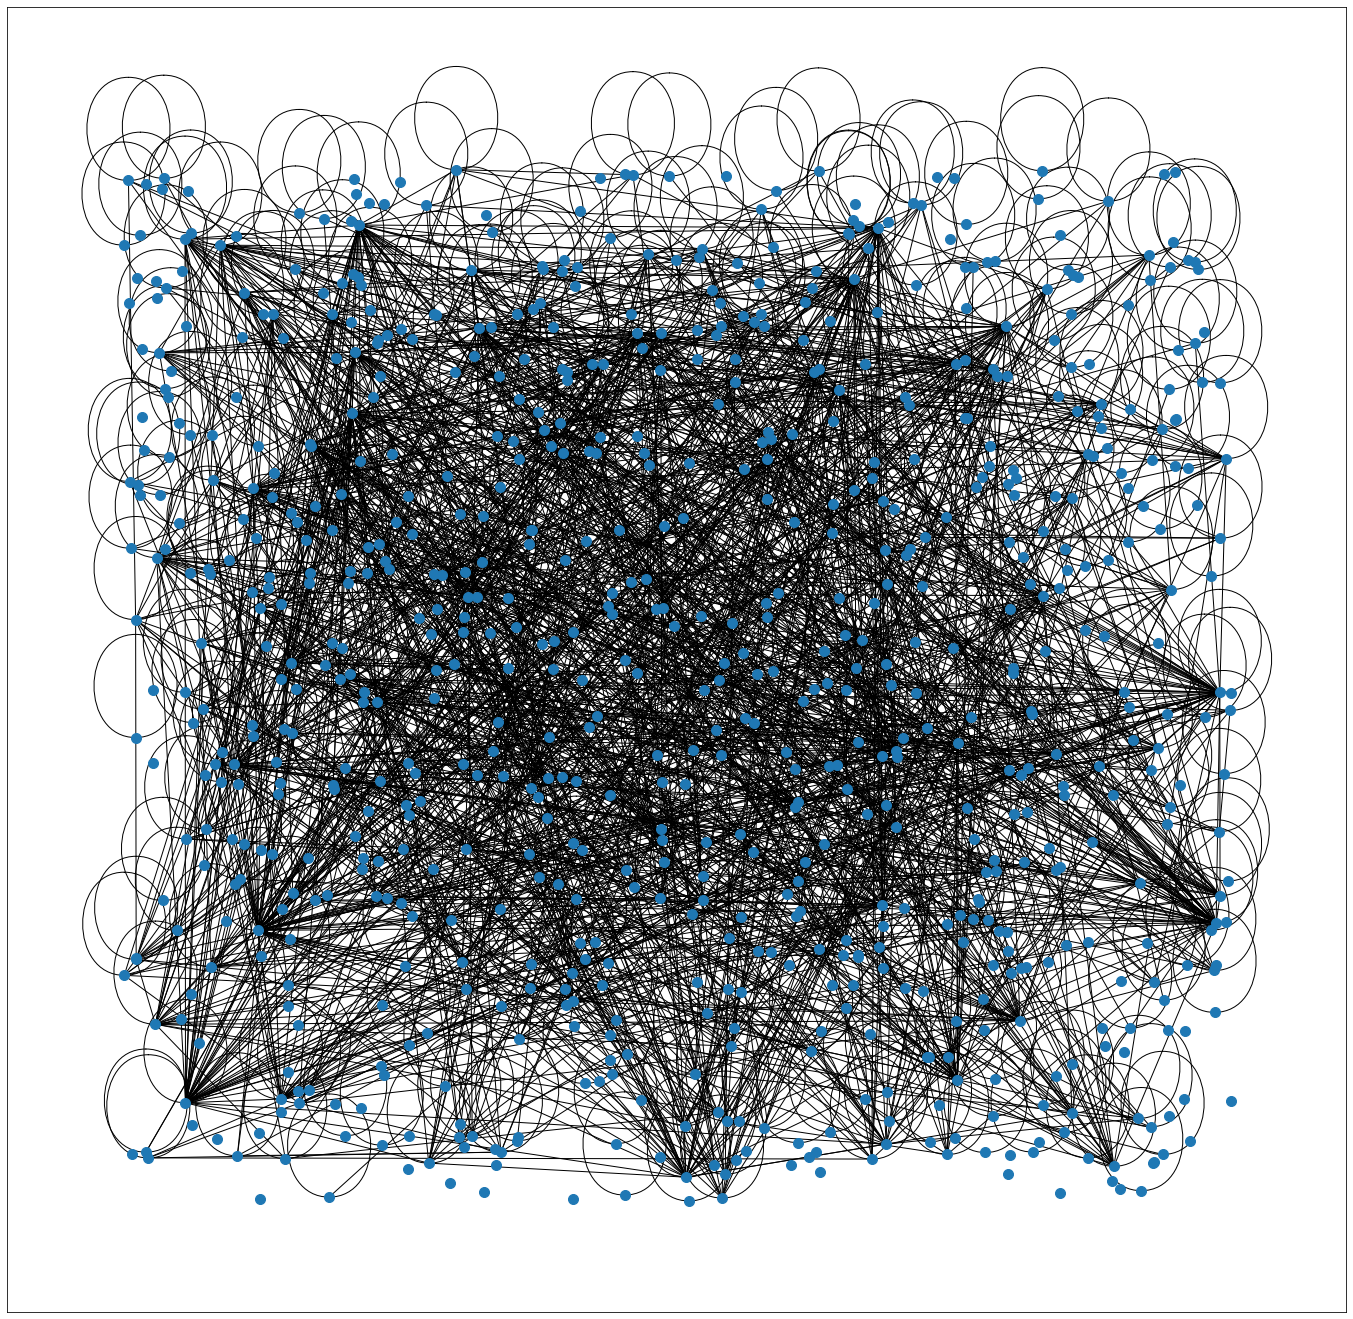

In [59]:
# EJERCICIO 3.1 

input = np.loadtxt(TEST_DIR + "ego-facebook.feat", dtype='i', delimiter=' ')
X = np.delete(input,0,1)

# Transformo matriz en archivo .txt
df = pandas.DataFrame(data=X.astype(float))
df.to_csv("ego-facebook.txt", sep=' ', header=False, float_format='%.2f', index=False)

# Matriz de similaridad
D = X @ X.T

# Calculo matriz de adyacencia y grafo de la red
n = D.shape[0]
x = np.random.rand(n)
y = np.random.rand(n)
W = np.vstack([x,y]).T
pos = {i:p for i,p in enumerate(zip(x,y))}
k = 5
f, axs = plt.subplots(figsize=(24,24))
min_non_0 = np.min(D[np.nonzero(D)])
ee = np.concatenate(([0], np.linspace(min_non_0, D.max() * 0.8, k)))
u = 7
# Construir matriz de adyacencia
A = D > u
# Construir grafo
G = nx.from_numpy_array(A)
# Plotear red
nx.draw_networkx_nodes(G,pos=pos, node_size=100)
nx.draw_networkx_edges(G,pos=pos)
axs[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

In [ ]:
# EJERCICIO 3.2 / 3.3

input = np.loadtxt(TEST_DIR + "ego-facebook.edges", dtype='i', delimiter=' ')
print(input)


In [73]:
# EJERCICIO 3.4

# Matriz de covarianza
M_x = (X.T @ X)/(X.shape[0] - 1)
# print(M_x.shape[0])

# Guardo matriz de covarianza en archivo .txt 
df = pandas.DataFrame(data=M_x.astype(float))
df.to_csv(TEST_DIR + "covariance-matrix-fb.txt", sep = ' ', header=False, float_format='%.6f', index=False)

# Obtengo autovalores y autovectores de la matriz de covarianza
# run_test("covariance-matrix-fb.txt", 1000, 0.0001)

# Calculamos autovalores de la matriz de facebook 
eigenvals = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovalores.out", dtype='f', delimiter=' ')

# Calculamos V (autovectores de M_x)
V = np.loadtxt(TEST_DIR + "covariance-matrix-fb.txt_autovectores.out", delimiter=' ', usecols=range(319))

# Calculamos D
D = np.diag(eigenvals)
print(D)
print(M_x)
res = V @ D @ V.T

[[ 2.950401e+00  0.000000e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 0.000000e+00  4.500650e-01  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  3.527240e-01 ...  0.000000e+00
   0.000000e+00  0.000000e+00]
 ...
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ... -1.700000e-05
   0.000000e+00  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  0.000000e+00
  -1.600000e-05  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00 -1.600000e-05]]
[[0.00252845 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00505689 0.         ... 0.         0.         0.        ]
 [0.         0.         0.01643489 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.02654867 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01390645 0.        ]
 [0.         0.         0.         ... 0.         0.         0.015

[[2849 3021]
 [2694 3096]
 [2818 2725]
 ...
 [3211 3431]
 [ 171   58]
 [2929 3104]]
